In [ ]:
import pandas as pd
import matplotlib as plt
observations = pd.read_csv('observations.csv')
observations.head()


,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [24]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [2]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [3]:
species = pd.read_csv('species_info.csv')
species.head(10)


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [22]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [5]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [7]:
biodiversity = observations.merge(species, on="scientific_name", how="left")
biodiversity.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN


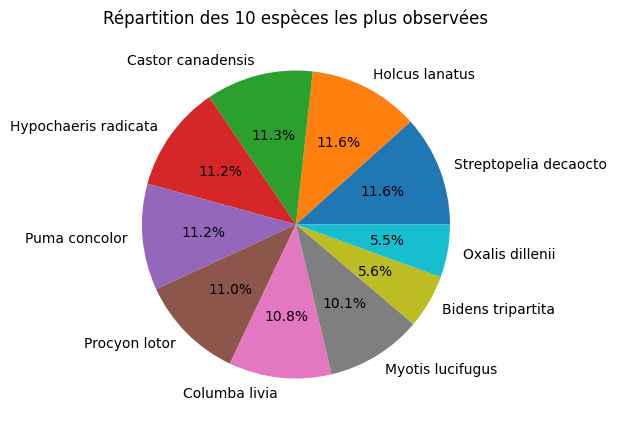

In [27]:
# Top 10 des espèces les plus observées
top_species = biodiversity.groupby('scientific_name')['observations'].sum().nlargest(10)

# Affichage du graphique en camembert
plt.figure(figsize=(5, 5))
plt.pie(top_species, labels=top_species.index, autopct='%1.1f%%')
plt.title('Répartition des 10 espèces les plus observées')
plt.show()


Text(0.5, 0, 'Parc')

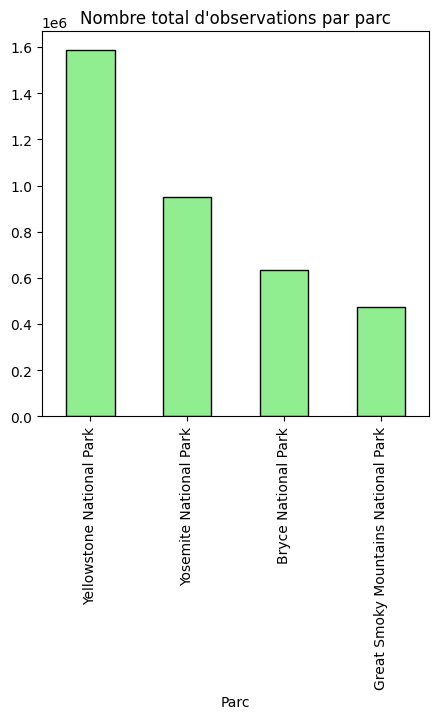

In [22]:
# Total des observations par parc
obs_by_park = biodiversity.groupby('park_name').observations.sum().sort_values(ascending=False)

# Affichage du graphique
plt.figure(figsize=(5, 5))
obs_by_park.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Nombre total d\'observations par parc')
plt.xlabel('Parc')  

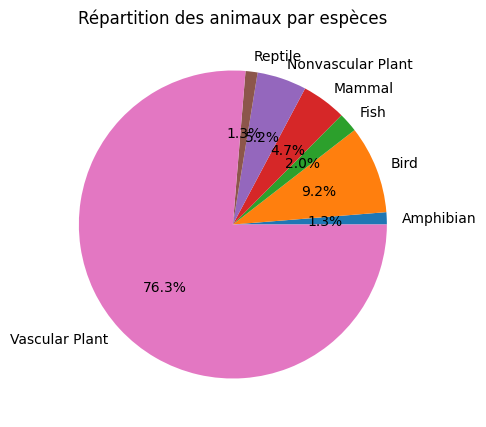

In [37]:
number_animal_by_species = biodiversity.groupby('category').category.count()

# Répartition des animaux par espèces
plt.figure(figsize=(5, 5))
plt.pie(number_animal_by_species, labels=number_animal_by_species.index, autopct='%1.1f%%')
plt.title('Répartition des animaux par espèces')
plt.show()

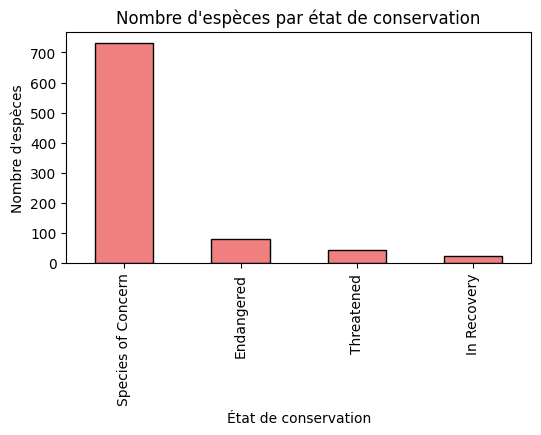

In [59]:
df= biodiversity.conservation_status.fillna("not concerned")

conservation_status = df.value_counts(dropna=False)
filtered_conservation = conservation_status.drop("not concerned")
plt.figure(figsize=(6, 3))
filtered_conservation.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Nombre d\'espèces par état de conservation')
plt.xlabel('État de conservation')
plt.ylabel('Nombre d\'espèces')
plt.show()
